# **Loan Default Prediction**: *Business Understanding & Exploratory Data Analysis*
## **Business Understanding**
### **Background**
As the country faces economic woes, the banking sector is especially being hit the hardest as Kenyans default on their loans due to the economic pressure weighing heavily on households and businesses. According to the latest *FinAccess Household Survey*, 16.6% of borrowers defaulted in 2024, up significantly from 10.7% in 2021.

A default occurs when a borrower fails to make their loan payments on time or fails to meet some of the provisional conditions of the loan agreement.

This increase coincides with a sharp rise in mobile and digital lending, which has made credit more accessible than ever. According to a survey by the credit rating agency, *TransUnion*, the surge in credit access, especially among under-35s, is unmatched by financial literacy, leading many borrowers into avoidable debt cycles, which in turn lead to high default rates.

When it comes to commercial banks, the *Central Bank of Kenya* (CBK) reports that the ratio of non-performing loans (NPLs), those unpaid for over 90 days, rose to 17.6 per cent by June 2025, up from 17.4 per cent in April. Also, from a total loan book of Sh4.045 trillion issued by banks as of December 2024, the spike in NPLs suggests that more than Sh712 billion is now at risk of not being recovered.

The CBK has linked this surge to job losses, stagnant incomes, and the overall rise in the cost of living, which have made it difficult for borrowers to service their loans. This marks **the highest default level recorded in 20 years** and highlights growing financial stress among borrowers.

### **Problem Statement**
Both commercial and **especially** digital lenders currently face difficulty in identifying borrowers who are likely to default. Without early warning systems, lenders risk financial losses, and borrowers risk deeper debt cycles. Without robust borrower profiling, digital lenders extend credit without fully assessing risk, a gap that this model seeks to close.

### **Project Objectives**
This project aims to:
- Develop a classification model that predicts loan default risk using data collected during loan applications. 

- Help lenders, through the model, to make informed, risk-sensitive decisions.

- Help borrowers manage their borrowing and avoid getting into debt cycles.

### **StakeHolders**
This model will benefit mobile loan companies, digital lenders, and financial analysts in Kenya's credit sector.

Other stakeholders include:
- **Investors**: Individuals or entities that own shares of the company and are interested in its profitability and stock performance. 

- **Creditors**: Those who have lent money to the company and are concerned with its ability to repay debts and interest. 

- **Management**: Management is responsible for the company's financial performance and is accountable to stakeholders. 

- **Borrowers**: The loan applicants.

### **Hypotheses**
- Applicants with no employment are more likely to default.

- Lower monthly income is associated with higher default rates.

- Shorter loan terms correlate with increased default risk.

## **Data Understanding**
In this section of the project we are trying to understand our data, its properties, the data types, the features, their distributions among others, as well as inspect it for data quality issues. The activities in this section include:
- Understanding the source of the data.

- Importing relevant dependencies and loading the dataset.

- Inspecting the dataset's properties.

- Exploring the data features.

### **Data Source**
This dataset was sourced from Kaggle's [Loan Default Prediction Dataset](https://www.kaggle.com/datasets/nikhil1e9/loan-default?resource=download). It contains information on borrowers and if they default on loans or not. 

#### *Why is this Dataset Suitable for the Project?*
t captures various borrower characteristics like income, employment type, and loan terms — all crucial in assessing loan risk. It also includes a binary target indicating loan default.

### **Importing Dependencies and Loading the Dataset**
In this notebook, we are mainly analyzing the dataset, for that we are only using `Pandas` for the analysis, `Seaborn` and `Matplotlib` for visualization.

In [1]:
# Import relevant dependencies.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

To load the dataset, we are using pandas' `read.csv()` method

In [2]:
# Load dataset.
loans_info = pd.read_csv('../Data/RawData/Loan_default.csv')

# Preview the dataset.
loans_info.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### **Data Properties Inspection**
We have succefully loaded the dataset to the notebook, so, our inspection begins. 

Here, we are inspecting the shape of the data, it's data types, what the columns contain, if we have any quality issues to worry about and so on. We are also carrying out a statistical analysis, to understand better features that contain numerical values.

#### *Shape*
This helps us know if the dataset is enough to help us make meaningful predictions. We are using Pandas' `.shape` method.

In [3]:
# Check the dataset's shape
loans_info.shape

(255347, 18)

With more than 250,000 records, we are positioned well to carry out our predictions. Having enough records ensures the reliability, accuracy, and generalizability of models and predictions, otherwise, insufficient data can lead to inaccurate outcomes and a lack of robust insights.

#### *Data Types*
We are usng `.info()` in this section, this is an important method for getting a concise summary of the dataset.

In [4]:
# Check the data types.
loans_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

The records in the dataset are stored as floats, integers and objects. The dataset also does not have any apparent missing values, indicating that the dataset is complete.

In the next cell, we are checking for any duplicates, and just ensuring that we do not have any null values.

In [6]:
# Find total number and percentage of missing values.
# Retrieve sum of missing values.
missing = loans_info.isnull().sum()

# Turn into percentage.
missing_percent = (missing / len(loans_info)) * 100

# Store in a DataFrame.
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})

# Filter out columns that don't have missing values.
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percent


In [7]:
# Find duplicate records.
duplicate_records = loans_info.duplicated().sum()

print(f'The dataset contains {duplicate_records} duplicated records')

The dataset contains 0 duplicated records


So far, the dataset is clean, contains no missing values and 0 dupolicated records.

Next, we are looking at the statistical summary of our numerical columns. We are using the `.describe()` method, it will give us the summative description of the dataset.

In [8]:
# 
loans_info.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


From the statistical summary above, we see that:
- The youngest loan applicant is 18 years old, while the oldest is almost 70 years old.

- The person with the highest income earns around 150,000 annually, as the one with the lowest earns around 15,000.

- The highest loan amount granted is almost 250,000, while the person with the highest creadit score has a credit score of 849. Additionally, the highest interest rate on a loan is 25%.

### **Further Exploration**
In this section, we are exploring the different columns on their own, and also in relation to our target variable. It includes:
- Understanding the target variable.

- Univariate Analysis.

- Bivariate Analysis.

#### *Understanding the Target Variable*
Here we are inspection our target variable, just to understand if we are dealing with a class imbalance issue or it is evenly distributed.

In [11]:
# Calculate loan default prevelance.
loans_info['Default'].value_counts(normalize=True) * 100

0    88.387175
1    11.612825
Name: Default, dtype: float64

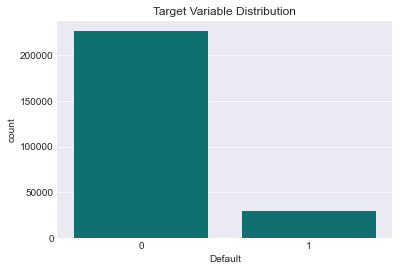

In [13]:
# Plot a chart
plt.style.use('seaborn-darkgrid') # -> Set the plot style.

# Plot a countplot
sns.countplot(x='Default', data=loans_info, color= 'teal')
plt.title("Target Variable Distribution")
plt.show()

The deafult rate is about 11%, indicating that the target variable is significantly imbalanced. According to the countplot, the number of defaulted records lie slightly below 30,000 as the non defaulted loan records lies way above 200,000.

#### *Univariate Analysis*
We are plotting the distributions of each predictor in the dataset. We are using histplots for numerical columns and countplots for the categorical columns. To streamline the process, and avoid repetition, we are employing the use of *Object Oriented Programming* (OOP).

In [14]:
# Create a numerical distribution class
class Numerical_EDA:
    '''This class returns a histogram displaying the specified numerical column's distribution.'''

    def __init__(self, data, figsize=(10, 6)):
        self.data = data
        self.figsize = figsize

    def distribution(self, series): # -> Plot numerical distribution.
        self.series = series
        plt.figure(figsize=self.figsize)
        sns.histplot(self.data[self.series], bins=30, kde=True, color='teal')
        plt.title(f'{self.series} Distribution')
        plt.xlabel(self.series)
        return plt.show()

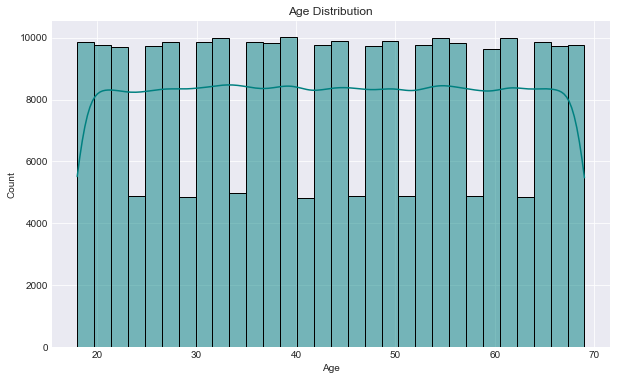

In [15]:
#  Instantiate the numerical class
plot = Numerical_EDA(loans_info)

# Plot age distribution
plot.distribution('Age')

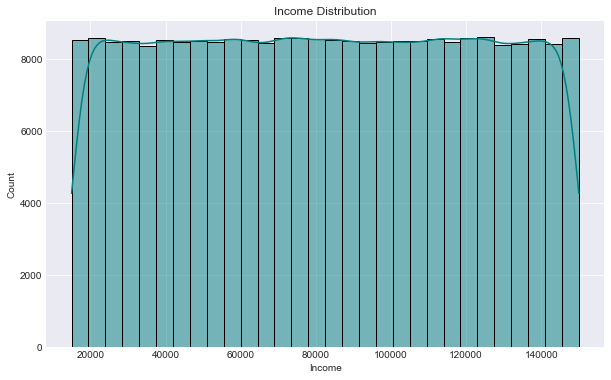

In [16]:
# Plot income distribution
plot.distribution('Income')

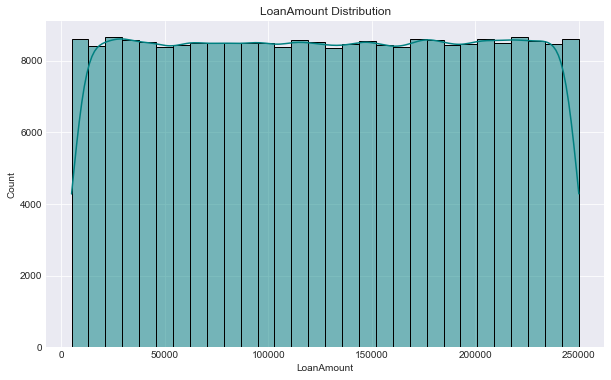

In [17]:
# Plot loan amount distribution
plot.distribution('LoanAmount')

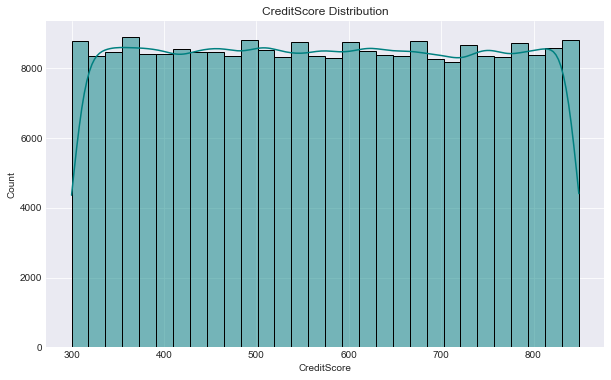

In [18]:
# Plot credit score distribution
plot.distribution('CreditScore')

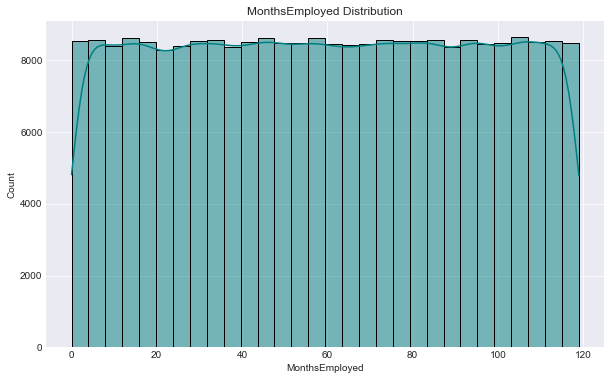

In [19]:
# Plot months employed distribution
plot.distribution('MonthsEmployed')

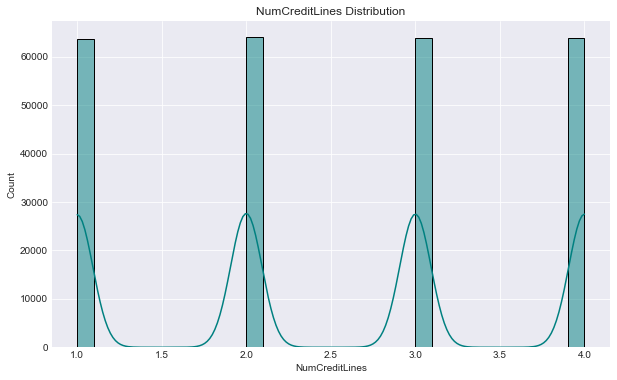

In [20]:
# Plot number of credit lines distribution
plot.distribution('NumCreditLines')

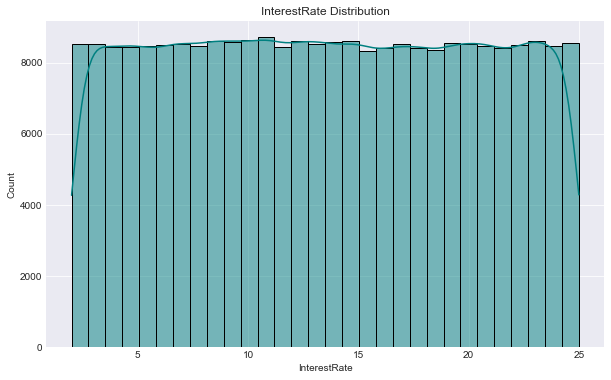

In [21]:
# Plot interest rate distribution
plot.distribution('InterestRate')

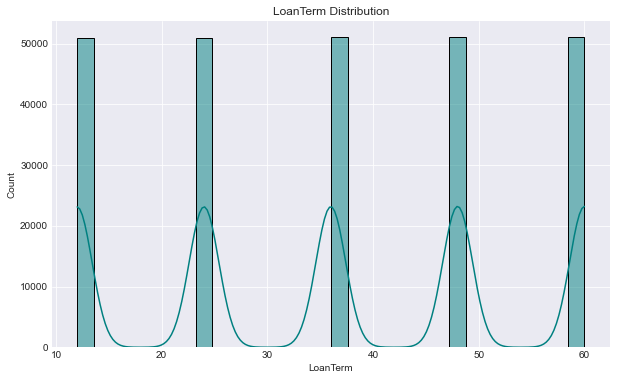

In [22]:
# Plot loan term distribution
plot.distribution('LoanTerm')

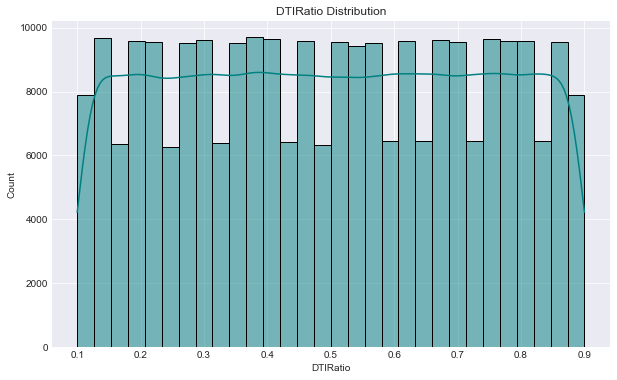

In [24]:
# Plot debt to income ratio distribution.
plot.distribution('DTIRatio')

In [27]:
# Create a categorical column count class
class Categorical_EDA:
    '''This class takes in a dataset, and by adding a column name in the object, it returns 
    a count plot of the column.'''

    def __init__(self, data, figsize=(10, 6)):
        self.data = data
        self.figsize = figsize

    def count(self, series): # -> Plot categorical counts.
        self.series = series
        plt.figure(figsize=self.figsize)
        sns.countplot(data= self.data, x= self.series, color= 'teal')
        plt.title(f'{self.series} Count')
        plt.xlabel(self.series)
        return plt.show()

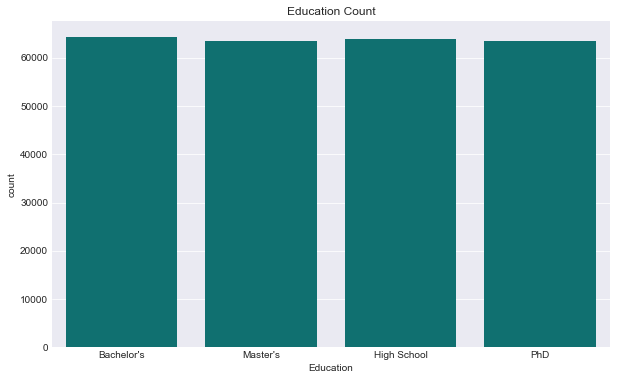

In [28]:
# Instantiate categorical eda class.
plot = Categorical_EDA(loans_info)

# Plot Eduaction level distribution
plot.count('Education')

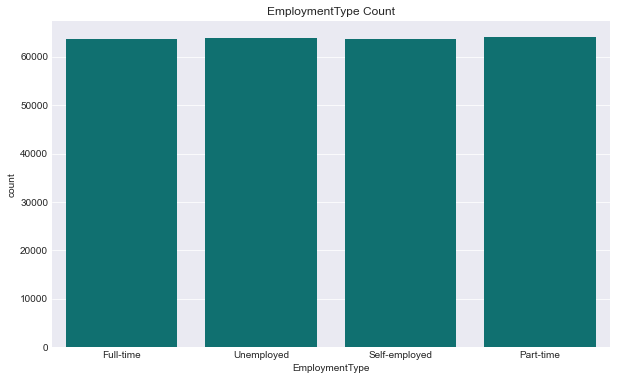

In [29]:
# Plot employment type distribution
plot.count('EmploymentType')

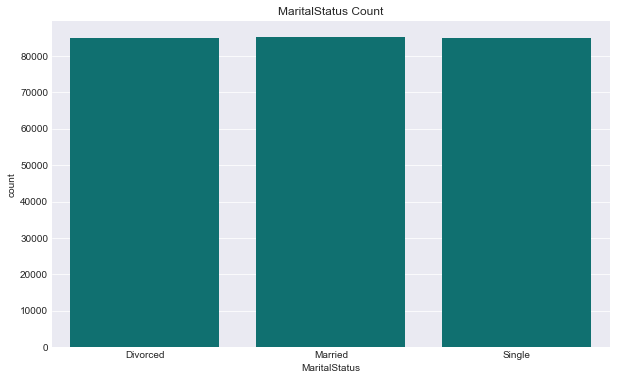

In [30]:
# Plot marital status distribution
plot.count('MaritalStatus')

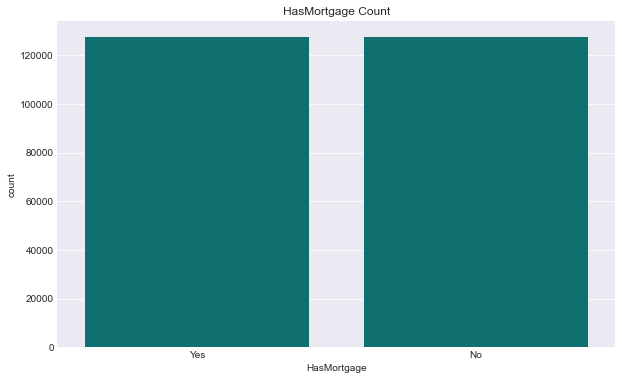

In [31]:
# Plot has mortgage distribution
plot.count('HasMortgage')

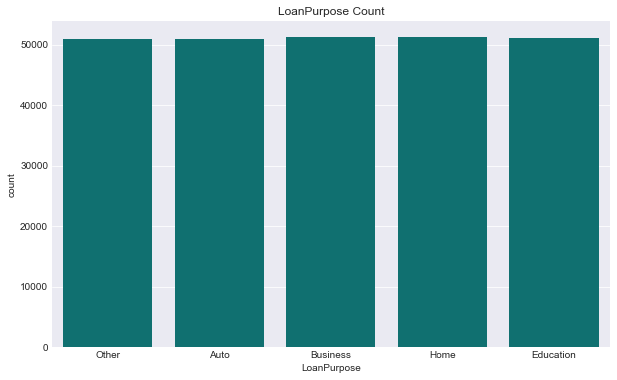

In [32]:
# Plot loan purpose distribution
plot.count('LoanPurpose')

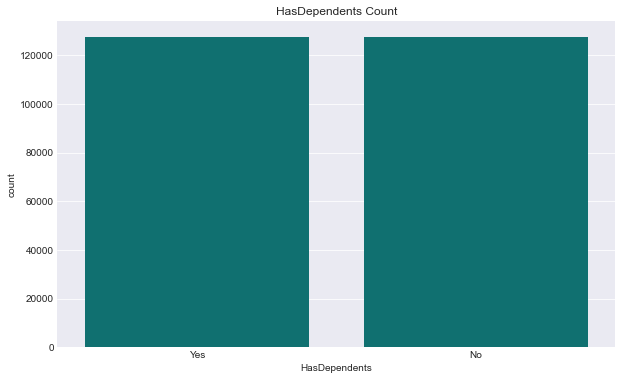

In [33]:
# Plot has dependents distribution
plot.count('HasDependents')

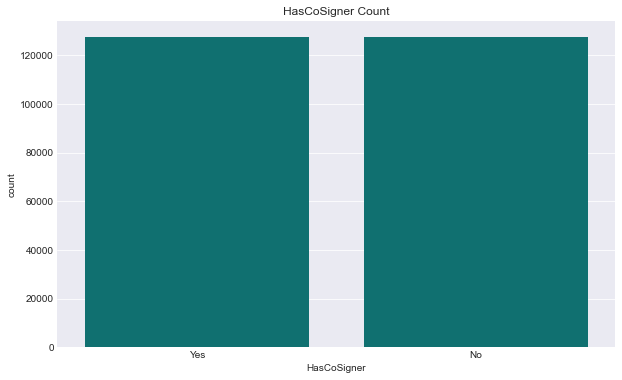

In [35]:
# Plot has cosigner distribution
plot.count('HasCoSigner')

#### *Univariate Analysis Summary*
Numerical columns:
7 out of 9 columns have uniform distributions, or almost uniform distributions, the rest also seem to have been aiming for the uniform distribution but not quite.

Categorical columns:
All the categorical columns have uniform distributed records.

#### *Bivariate Analysis*
In this section, we are plotting selected columns against the target variable. This is to help understand the relationship between some factors and loan defaults.

The selected columns are:
- Education type

- Marital status

- Loan amount

- Loan term

- Loan purpose

In [ ]:
# Create a countplot + hue class.
class Rlshp_EDA:
    plt.style.use('dark_background') # -> Set the plot style. (Choose dark because the class 'serviced', wasn't visible in light figures.)
    '''This class takes in a dataset, and by adding columns names for x and y axes, it returns a
       barplot that displays the relationship between the two columns.
       0 = Serviced
       1 = Defaulted'''

    def __init__(self, data, figsize=(12, 6)):
        self.data = data
        self.figsize = figsize

    def bar(self, x_data, hue= 'Default'): # -> Plot relationships.
        self.x_data = x_data
        self.hue = hue
        plt.figure(figsize=self.figsize)
        labels = ['Serviced', 'Defaulted']
        sns.countplot(data= self.data, x= self.x_data, hue= self.hue, color= 'teal')
        plt.title(f'{self.hue} vs {self.x_data}')
        plt.xlabel(self.x_data)
        plt.ylabel(self.hue)
        plt.legend(labels)
        return plt.show()

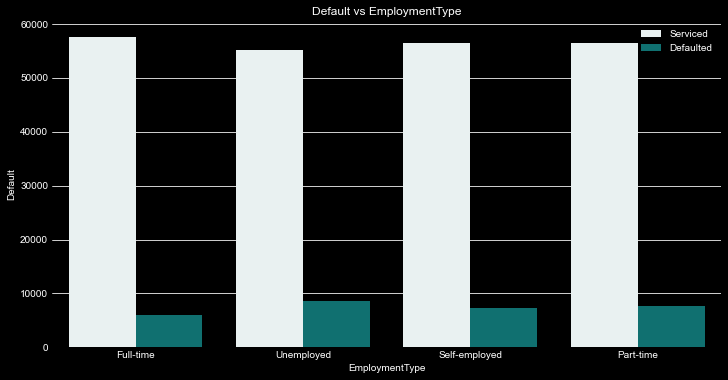

In [39]:
# Instantiate the bivariate analysis class
plot = Rlshp_EDA(loans_info)

# Plot employment type vs default
plot.bar('EmploymentType')

- Unemployed people are most likely to deafult on loans than all the people with the other types of employment. 

- Those with part time jobs, closely follow the unemployed on default rates.

- People holding full time jobs are the least liekly to deafult on loans.

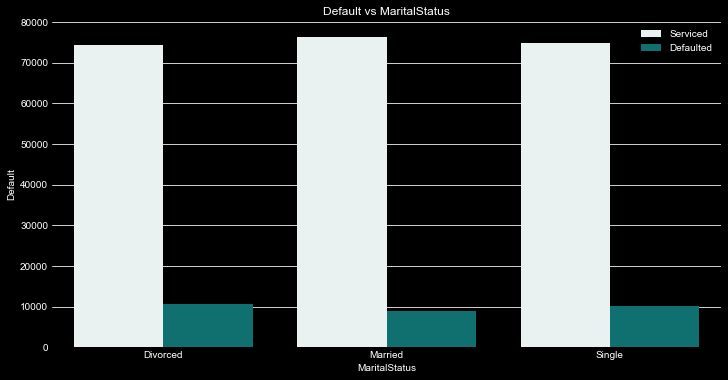

In [40]:
# Plot marital status vs defaults
plot.bar('MaritalStatus')

- Divorced people have the highest number of deafulted records, indicating that they are the most likely to deafult on loans, followed closely by single people.

- Married people have the highest number of serviced loans, indicating that they are the most likely to return loans, and also less likely to deafult on loans compared to their single and divorced counterparts.

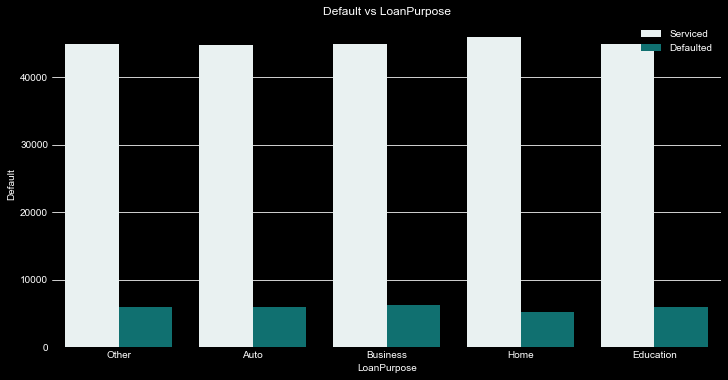

In [44]:
# Plot loan purpose vs default
plot.bar('LoanPurpose')

- Applicants using their loans on businesses and education have the highests default rates, followed closely by those using the loans on auto purposes.

- People using the loans on their households have the lowest default rates and the highest serviced loans rates.

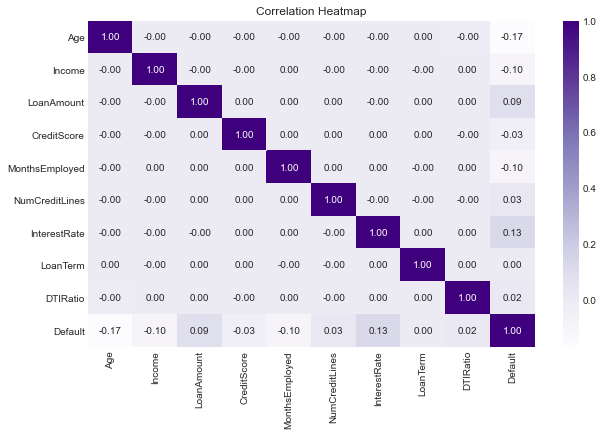

In [45]:
# Perform correlation
plt.style.use('seaborn-darkgrid') # -> Set the plot style.
corr = loans_info.select_dtypes(include='number').corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Purples', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **Summary**
So far, we have observed that almost all of our predictive features have evenly distributed categories. Here's what this means for the project:
- The model has enough examples from each group to learn from.

- There’s no dominant class overpowering everything (like 90% married, 10% single).

However, it is important to note that this could be a problem if those evenly distributed features have no relationship with the target.This is because even though they’re evenly spread, they will not help the model distinguish between defaulters and non-defaulters.

#### *Next Steps*
As we head to preprocessing and modeling, we’ll check for:

- Whether each feature has predictive power (via correlation, mutual info, feature importance, etc.)

- Whether certain combinations (e.g. loan amount * employment type) reveal more than individual columns do.